In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(6,3)}, style='whitegrid')
%matplotlib inline
import scipy
from statsmodels.stats.weightstats import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
import scipy
import statsmodels

In [3]:
data = pd.read_csv('measures.txt')

In [4]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


### 1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков.

In [5]:
data.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [6]:
data.isna().sum() # Пропущенных значений в виде NA нет

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [7]:
data.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [8]:
data.describe() # Пропущенных значений в виде нулей тоже нет

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.333733e+01,3.232322e+01,6.430889e+01,-2.899370e+01,5.439572e+01,2.209956e+03,-7.092833e+01,4.330229e+01,5.691077e+01,4.525002e+01,2.423961e+01,3.623050e+01,3.549608e+01
std,4.336464e+01,2.027951e+01,2.968288e+01,6.223175e+01,2.323587e+01,1.874061e+03,6.660061e+01,9.159176e+01,2.001114e+01,1.948673e+01,1.940425e+00,7.673032e+01,2.506011e+01
min,-2.529093e+01,1.376190e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,1.410069e+01,-2.464667e+02,2.000000e+00
25%,1.209668e+01,1.860544e+01,3.937440e+01,-8.525315e+01,3.334926e+01,3.836995e+02,-1.192647e+02,1.096400e+00,3.900360e+01,2.877491e+01,2.309487e+01,-4.055462e-02,1.400000e+01
50%,4.752466e+01,1.926167e+01,6.356562e+01,-7.620751e+00,5.260343e+01,1.999976e+03,-5.073550e+01,2.992396e+01,5.760014e+01,3.972105e+01,2.411081e+01,2.089365e+01,2.900000e+01
75%,8.757509e+01,4.179416e+01,8.764565e+01,8.295827e-01,7.212174e+01,3.749966e+03,-2.980322e+00,1.131816e+02,7.169332e+01,5.869643e+01,2.591768e+01,9.801524e+01,5.700000e+01
max,1.330313e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,9.985647e+01,3.071420e+01,2.610057e+02,8.100000e+01


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   stator_winding  1048575 non-null  float64
 3   u_d             1048575 non-null  float64
 4   stator_tooth    1048575 non-null  float64
 5   motor_speed     1048575 non-null  float64
 6   i_d             1048575 non-null  float64
 7   i_q             1048575 non-null  float64
 8   pm              1048575 non-null  float64
 9   stator_yoke     1048575 non-null  float64
 10  ambient         1048575 non-null  float64
 11  torque          1048575 non-null  float64
 12  profile_id      1048575 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 104.0 MB


##### Оценим, есть ли у признаков значения-выбросы

<AxesSubplot:ylabel='u_q'>

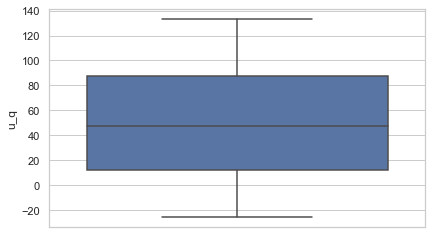

In [10]:
sns.boxplot(y='u_q', data=data)

<AxesSubplot:ylabel='coolant'>

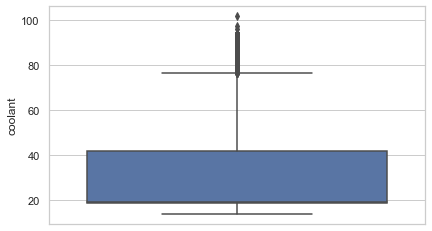

In [11]:
sns.boxplot(y='coolant', data=data)

<AxesSubplot:ylabel='stator_winding'>

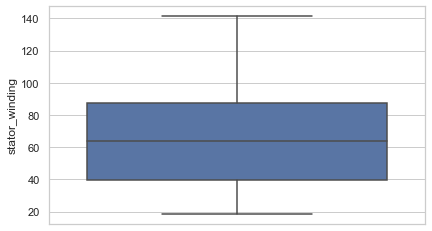

In [12]:
sns.boxplot(y='stator_winding', data=data)

<AxesSubplot:ylabel='u_d'>

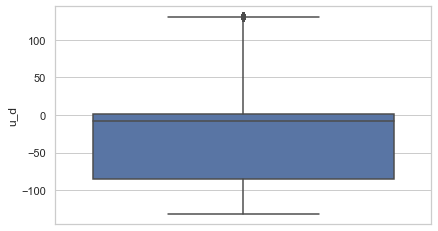

In [13]:
sns.boxplot(y='u_d', data=data)

<AxesSubplot:ylabel='stator_tooth'>

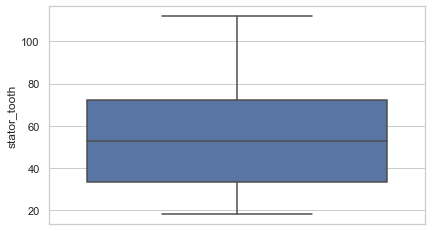

In [14]:
sns.boxplot(y='stator_tooth', data=data)

<AxesSubplot:ylabel='motor_speed'>

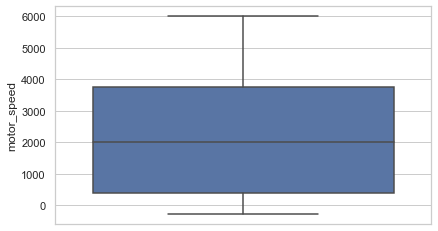

In [15]:
sns.boxplot(y='motor_speed', data=data)

<AxesSubplot:ylabel='i_d'>

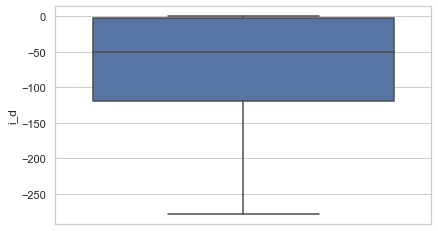

In [16]:
sns.boxplot(y='i_d', data=data)

<AxesSubplot:ylabel='i_q'>

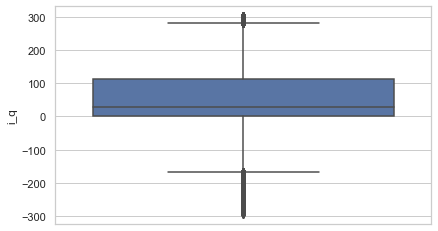

In [17]:
sns.boxplot(y='i_q', data=data)

<AxesSubplot:ylabel='pm'>

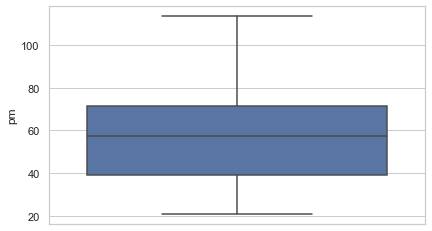

In [18]:
sns.boxplot(y='pm', data=data)

<AxesSubplot:ylabel='stator_yoke'>

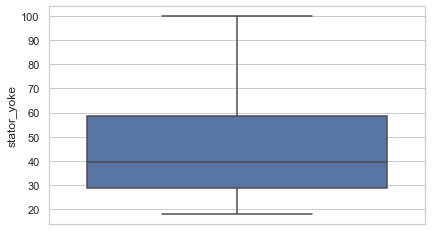

In [19]:
sns.boxplot(y='stator_yoke', data=data)

<AxesSubplot:ylabel='ambient'>

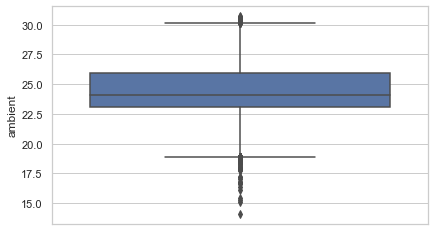

In [20]:
sns.boxplot(y='ambient', data=data)

<AxesSubplot:ylabel='torque'>

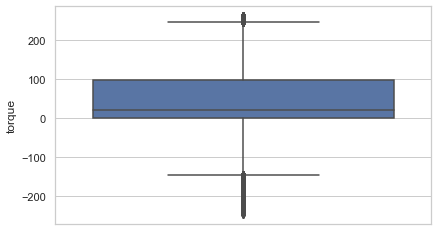

In [21]:
sns.boxplot(y='torque', data=data)

<AxesSubplot:ylabel='profile_id'>

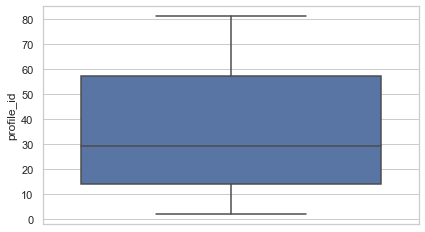

In [22]:
sns.boxplot(y='profile_id', data=data)

Наблюдение:

У параметров coolant, i_q, ambient и torque обнаружены выбросы. 
Сначала построим модель на полных данных, потом попробуем убрать выбросы и проверим, повлияет ли это на качество.

#### Оценка коэффициента корреляции

In [23]:
correlation = data.corr()
correlation['motor_speed'].sort_values(ascending=False)

motor_speed       1.000000
u_q               0.649764
pm                0.500871
stator_winding    0.455259
stator_tooth      0.433838
stator_yoke       0.296248
ambient           0.118738
coolant           0.028211
profile_id       -0.023263
torque           -0.048141
i_q              -0.077513
u_d              -0.350639
i_d              -0.696822
Name: motor_speed, dtype: float64

Наблюдение:

значения параметра motor_speed с некоторыми данными имеет положительную корреляцию, а с некоторыми отрицательную.

#### Матрица корреляций признаков

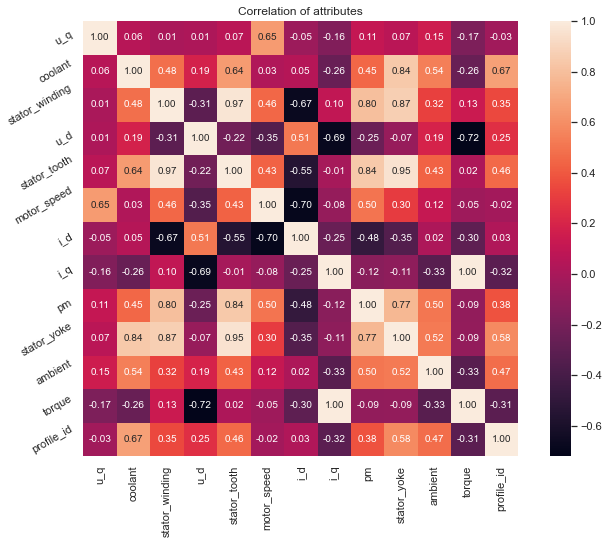

In [24]:
plt.figure(figsize=(10,8))
plt.title('Correlation of attributes')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

#### Гистограммы распределения признаков

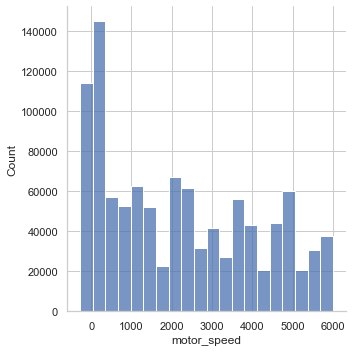

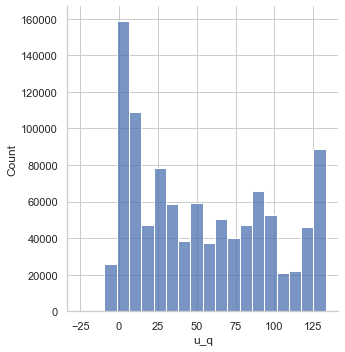

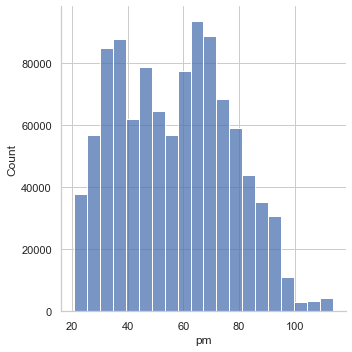

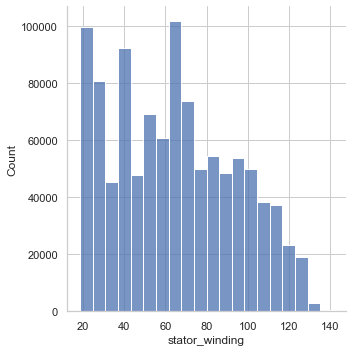

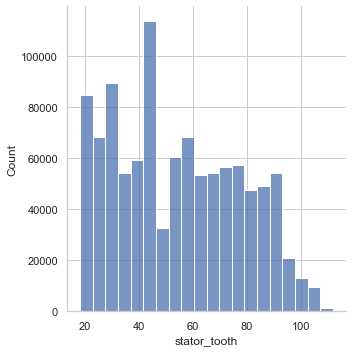

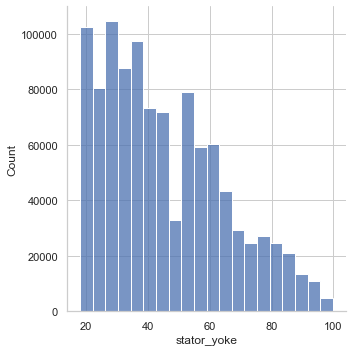

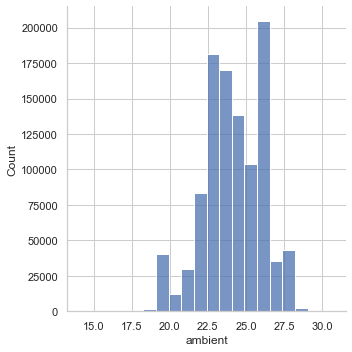

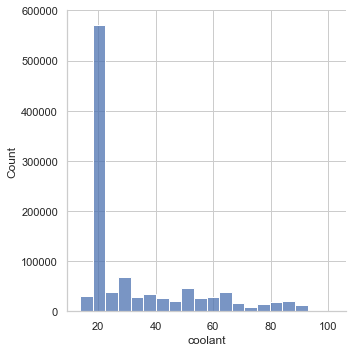

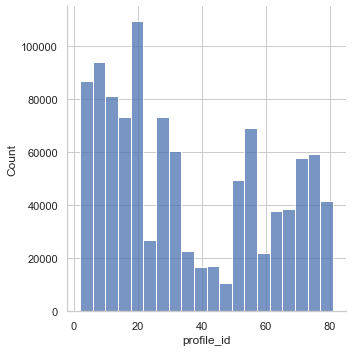

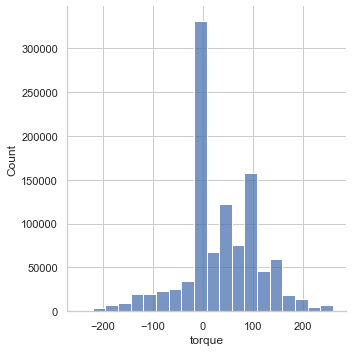

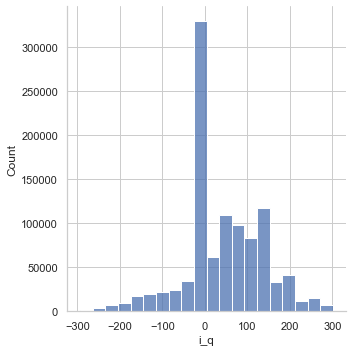

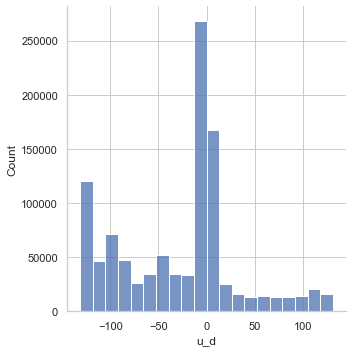

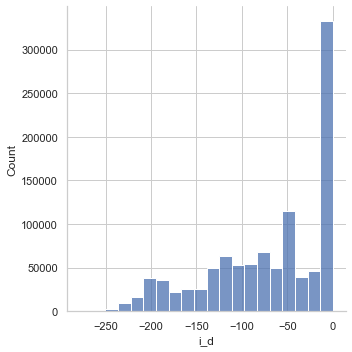

In [25]:
sns.displot(data=data, x='motor_speed', kind='hist', bins=20)
sns.displot(data=data, x='u_q', kind='hist', bins=20)
sns.displot(data=data, x='pm', kind='hist', bins=20)
sns.displot(data=data, x='stator_winding', kind='hist', bins=20)
sns.displot(data=data, x='stator_tooth', kind='hist', bins=20)
sns.displot(data=data, x='stator_yoke', kind='hist', bins=20)
sns.displot(data=data, x='ambient', kind='hist', bins=20)
sns.displot(data=data, x='coolant', kind='hist', bins=20)
sns.displot(data=data, x='profile_id', kind='hist', bins=20)
sns.displot(data=data, x='torque', kind='hist', bins=20)
sns.displot(data=data, x='i_q', kind='hist', bins=20)
sns.displot(data=data, x='u_d', kind='hist', bins=20)
sns.displot(data=data, x='i_d', kind='hist', bins=20)

### 2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизуализируйте решения.

In [26]:
X = data.drop(columns=['motor_speed'])
y = data['motor_speed']

In [27]:
X.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [28]:
y

0             0.002866
1             0.000257
2             0.002355
3             0.006105
4             0.003133
              ...     
1048570    2096.735442
1048571    2039.850834
1048572    1989.249199
1048573    1928.984749
1048574    1874.340648
Name: motor_speed, Length: 1048575, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
lr.coef_

array([  21.72464664,   43.17441159,  -76.42016912,   -4.65702187,
        210.69952276,  -18.48377318,    5.61136592,   11.93278401,
       -180.73909412,  -50.02236958,  -11.87128798,   -2.26270985])

In [33]:
lr.intercept_

642.3619662465535

In [34]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [35]:
np.array(y_test)

array([2999.96508789,  773.69945731, 4499.95654297, ..., 2499.96850586,
       3499.97070312,  249.98413086])

In [36]:
np.array(y_test_predicted)

array([3481.89614855,  971.40641391, 4498.2270224 , ..., 2980.90121322,
       3737.87878438,  -43.67725788])

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(343.339278069879, 341.64080501036074)

In [39]:
np.mean(np.abs(y_train_predicted-y_train))

343.3392780698742

In [40]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(218859.13442691896, 216056.55659745488)

In [41]:
np.mean((y_train_predicted-y_train)**2)

218859.13442692082

#### Перекрестная проверка на 5 фолдах

In [42]:
y = np.ravel(y)

In [43]:
model = LinearRegression()
model = model.fit(X, y)

In [44]:
model.score(X, y)

0.9378041086816946

In [45]:
scores = cross_val_score(LinearRegression(), X, y, cv = 5)
print(scores)
print(scores.mean())

[0.95383828 0.95233155 0.93320901 0.88704616 0.90071324]
0.9254276481085304


### 3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.

#### Делим данные на отдельные наборы для обучения и тестирования

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
X_train.shape, X_test.shape

((838860, 12), (209715, 12))

In [48]:
X_train.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [49]:
X_train.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [50]:
X_test.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [51]:
X_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
592908,31.058187,19.136200,58.810936,-40.799591,45.188618,-65.979332,172.999252,45.661900,35.488419,24.830076,139.184204,16
184386,4.235912,18.226608,19.423904,1.451926,18.707680,-1.999193,1.097641,23.920012,18.584953,22.218571,0.190463,3
1021782,98.709101,61.221979,91.709805,84.012625,81.162807,-125.726827,-53.930469,68.164407,71.507528,23.295992,-50.000354,62
59606,122.210220,19.300341,54.210556,-29.586216,50.061344,-4.817371,29.950377,74.632187,39.452286,20.932447,19.882008,32
93792,8.791241,18.669298,101.872696,-9.799631,71.138184,-122.973755,242.423553,35.351620,51.335346,22.396553,206.784775,2


In [52]:
X_test.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
875680,72.921327,91.053011,102.295896,107.028548,95.137349,-102.863991,-117.958078,74.654065,91.749761,26.101854,-1.020678e+02,55
1046906,126.063086,23.089439,72.117858,12.658546,60.330576,-111.758811,-11.184589,66.744684,45.593834,25.778196,-1.056658e+01,65
646861,-2.326880,54.874329,55.833854,0.341376,54.167575,-2.000999,1.097317,66.773043,53.499610,27.647413,1.540877e-225,74
704385,-1.665663,26.909153,42.073881,2.356090,38.822230,-2.000496,1.098661,68.558748,35.353318,27.983994,-3.730081e-109,68
798051,48.952776,60.078057,101.116862,-62.505981,81.997295,-58.384975,159.641166,70.884085,70.888119,25.102537,1.233485e+02,80


#### Feature scaling

In [53]:
cols = X_train.columns

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [56]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [57]:
X_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.514270,-0.649985,-0.184687,-0.189046,-0.395674,0.074673,1.415477,-0.561968,-0.500365,0.304462,1.341012,-0.778171
1,-1.132618,-0.694867,-1.511536,0.489891,-1.535377,1.034999,-0.461489,-1.648808,-1.368020,-1.041430,-0.470422,-1.297005
2,1.045321,1.426654,0.923593,1.816556,1.152606,-0.822121,-1.062332,0.562893,1.348498,-0.486159,-1.124533,1.057702
3,1.587104,-0.641885,-0.339662,-0.008859,-0.185958,0.992699,-0.146451,0.886206,-0.296899,-1.704260,-0.213792,-0.139606
4,-1.027602,-0.673023,1.265955,0.309091,0.721160,-0.780799,2.173511,-1.077361,0.313059,-0.949703,2.222016,-1.336915


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [60]:
y_train_predicted_lr = lr.predict(X_train)
y_test_predicted_lr = lr.predict(X_test)

In [61]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(7.181056495048368, 685.4999553534374)

In [62]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(12.306635146515223, 1760.2281959752152)

In [63]:
mean_absolute_error(y_train_predicted_lr, y_train), mean_squared_error(y_train_predicted_lr, y_train)

(1836.8030316794516, 5849792.336192216)

In [64]:
mean_absolute_error(y_test_predicted_lr, y_test), mean_squared_error(y_test_predicted_lr, y_test)

(1834.3408623646858, 5846405.573233369)

#### Проверка на переобучение и недообучение

In [65]:
print('Training set score: {:0.4f}'.format(knn.score(X_train, y_train)))
print ('Test set score: {:0.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9998
Test set score: 0.9995


In [66]:
print('Training set score: {:0.4f}'.format(lr.score(X_train, y_train)))
print ('Test set score: {:0.4f}'.format(lr.score(X_test, y_test)))

Training set score: -0.6664
Test set score: -0.6615


#### Перекрестная проверка на 5 фолдах

In [67]:
y = np.ravel(y)

In [68]:
model = KNeighborsRegressor()
model = model.fit(X, y)

In [69]:
model.score(X, y)

0.9998263926830063

In [70]:
scores = cross_val_score(KNeighborsRegressor(), X, y, cv = 5)
print(scores)
print(scores.mean())

[0.98572505 0.9875963  0.99002071 0.99684774 0.9948151 ]
0.9910009784446825


#### Визуализация

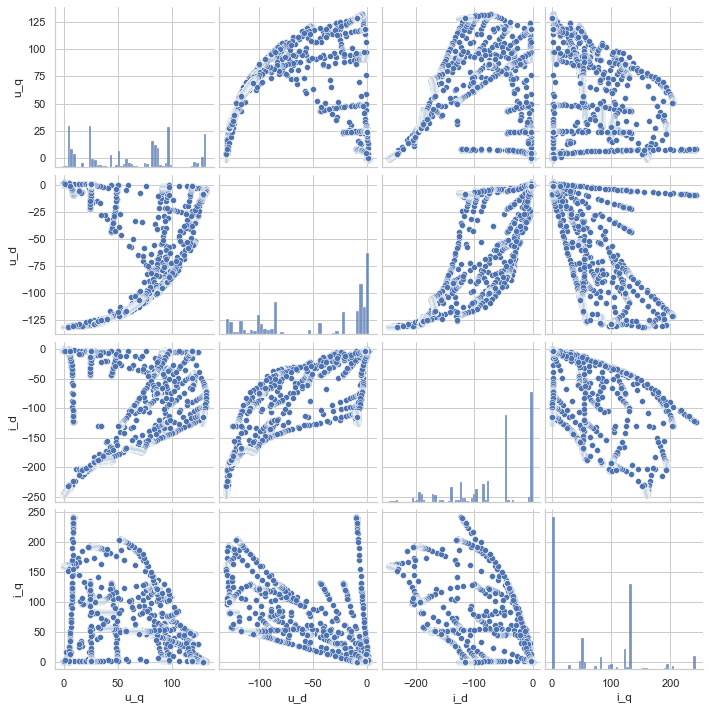

In [71]:
cols_to_plot = ['u_q', 'u_d', 'i_d', 'i_q']
sns.pairplot(data[cols_to_plot][:200000])

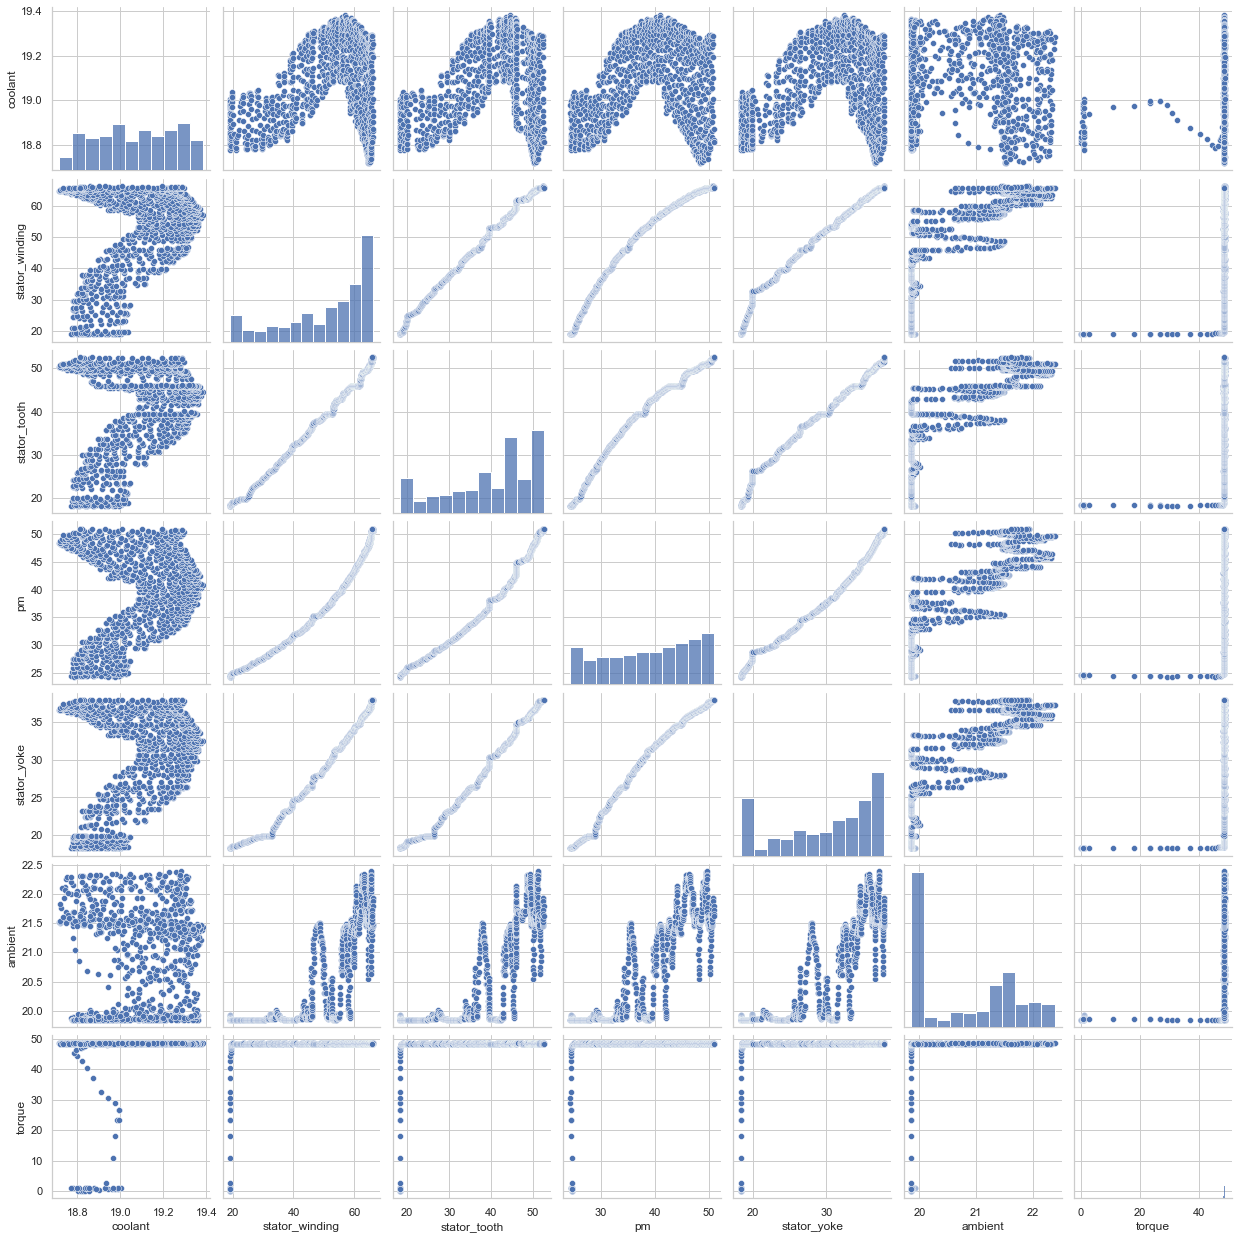

In [72]:
cols_to_plot = ['coolant', 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque']
sns.pairplot(data[cols_to_plot][:1000])

### 4. Сгенерируйте новые признаки:

Нормализация вектора тока (корень квадратный из суммы квадратов токов);
нормализация вектора напряжения (корень квадратный из суммы квадратов напряжения);
полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения);
эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [73]:
data['n_i'] = np.sqrt(data['i_d']**2+data['i_q']**2)
data['n_u'] = np.sqrt(data['u_d']**2+data['u_q']**2)
data['t_p'] = data['n_i']*data['n_u']
data['eff_p'] = (data['i_d']*data['u_d'])+(data['i_q']*data['u_q'])

In [74]:
data.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,n_i,n_u,t_p,eff_p
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,0.004431,0.570659,0.002529,-0.001695
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,0.000992,0.446789,0.000443,0.000071
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,0.001346,0.577165,0.000777,-0.000651
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,0.002046,0.454893,0.000931,-0.000677
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,0.074292,0.576530,0.042832,0.003852
